# Intro to Pandas

This notebook cover introductory tutorial to Pandas. The talk has been given as a part of **Victoria Data Science Meetup** series. 

Let us dive in and import necessary modules

## Part 1: Load necessary modules (Environment Setup)

In [1]:
# Modules for handling the data
import pandas as pd
import numpy as np

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Helps in plotting figures inline
%matplotlib inline 

# Few ML modules
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

## Part 2: Import Data

In this stage we will load the data in the `./data/` folder. If you haven't downloaded the data yet, please do the following steps:
- Sign up to **[Kaggle](https://www.kaggle.com/)** 
- Join the **[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)** competition 
- Download the competition [data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) and accept the terms if prompted.
- Unzip the folder and copy the `train.csv, test.csv, data_description.txt` files to `./data/` folder.


Loading the data in Pandas is very easy. For this, we will be using [`read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). For more details about this method, please see the attached link. In short, the read_csv method loads the csv or any tabular/structured data into pandas data-frames. Pandas dataframes are quite similar to Python's dictionaries. Let us load the dataset and then we can play with the loaded data in the next section.

In [2]:
# Paths to the data
data_dir = './data/'
train_csv = data_dir + 'train.csv'
test_csv = data_dir + 'test.csv'

# Load data into pandas dataframe
train = pd.read_csv(train_csv)
test = pd.read_csv(test_csv)

## Part 3: Playing with data

Thanks to Pandas! visualizing and playing with huge datasets is very easy with this library. In this section we will look into few functionalities of Pandas by playing with the dataset:

- Sneak Peek into dataset: `df.head()`
- Shape of dataset: `df.shape`
- Know the features: `df.columns`
- General info about the dataset: `df.info()`
- Change data types: Int to Float, String to Int, etc.
- Statistical characteristics of data: `df.describe()`

#### Sneak Peek into dataset
In this part, we will be checking how our dataset will look like. In general, checking few examples on the dataset should give us an idea on how our dataset looks like. We will use [`Pandas.DataFrame.head()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) for this.

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# We can also use a number to tell how many examples we want to observe.
test.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


#### Shape of dataset

In Pandas, knowing the shape of dataset is similar to Numpy. If the shape of dataset is given as `M x N`, M is the number of examples and N is the number of features in our current data.

In [5]:
print("Size of the train data =", train.shape)
print("Size of the test data = {}".format(test.shape))

Size of the train data = (1460, 81)
Size of the test data = (1459, 80)


So we have 1460 examples given in train dataset and 1459 samples in test to predict. We can observe that there are 81 features in train dataset and 80 features in test dataset. The missing feature in the test is the feature we need to predict. Now let us check what features we have in our dataset.

#### Know the features

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

As we can see above, `df.columns` can give us the information about the current features in the dataset. More information about features can be known from `./data/data_description.txt`. Few things that we can do here are remove those features that are not needed. The feature `'Id'` is a unique id given to each example. We can remove this feature by using [`Pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html).

In [7]:
train.drop(columns=['Id'], axis=1, inplace=True)
test.drop(columns=['Id'], axis=1, inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### General info about dataset

In this part, let us see some general information about the dataset.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

From above we can observe that there are 3 features with float64 type, 34 features with int64 type and 43 of type objects (strings). We can also see there are some NaNs in the dataset. We can get back to filling NaNs later.

#### Statistical characterisitics of data

The statistical characteristics of the features usually differ based on the feature type. Let us see some stats for different feature data-types.

In [9]:
train.describe(include=['int64', 'float64'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


#### Correlation between features

We will use `df.corr()` to get the correlation between features, and use seaborn to visualize it. The correlation matrix can help us to visualize how each feature is correlated to `SalePrice` of the house

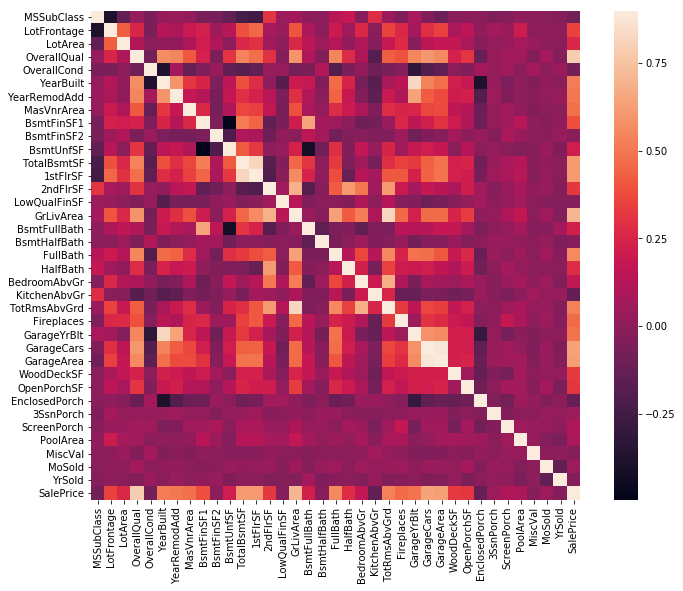

In [11]:
corr_mat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, vmax=0.9, square=True)

## Part 4: Feature Engineering

In this part, let us modify and tweak the features such that we can come with features that are suitable to train a ML model.

In [12]:
# Place holders for train and test data size
num_train = train.shape[0]
num_test = test.shape[0]

y_train = train.SalePrice.values

all_data = pd.concat((train, test), sort=False).reset_index(drop = True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

print("Shape of all_data = {}".format(all_data.shape))

Shape of all_data = (2919, 79)


#### Fill the missing data

In this part, we will check the percentage of missing values and fill them with either mean/median/mode/None based on the type of feature. We might also remove certain features that doesn't add value. And change data-types of features to more suitable types.

In [13]:
# Check for NaN values and compute the percentage for each feature
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

# Drop the features that have 0 NaN values & sort the rest
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

# Print the results
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5,1,'Percent missing data by feature')

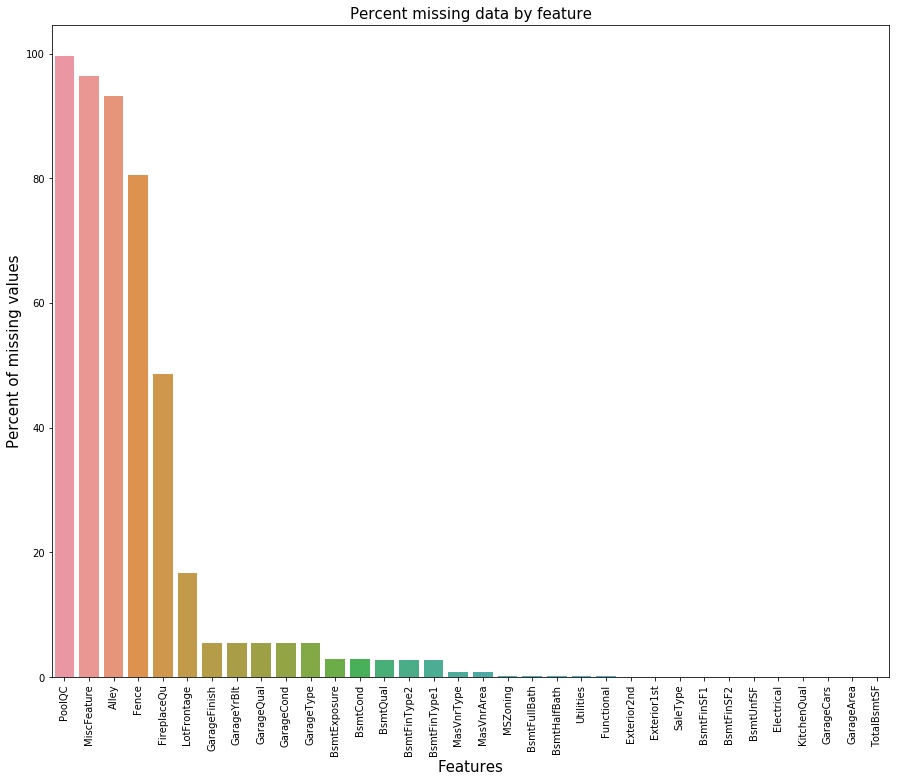

In [14]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### Imputing missing values

Let us impute by proceeding through each feature sequentially.

- **PoolQc** - NA means 'No pool'. Majority of houses usually don't have pool.
- **MiscFeature** - NA means 'No Misc Feature'.
- **Alley** - NA means 'No Alley access'.
- **Fence** - NA means 'No Fence'
- **FireplaceQu** - NA means 'No Fire place'
- Similarly fill NA with 'None' for **GarageType**, **GarageFinish**, **GarageQual** and **GarageCond**.
- **GarageYrBlt**, **GarageArea** and **GarageCars**: Replace NA with 0. No garage = no cars.
- **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**, **BsmtFullBath** and **BsmtHalfBath**: Missing values are 0 for no basement.
- **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1** and **BsmtFinType2**: Categorical basement values. NaN means no basement.
- **MasVnrType**: NA means 'No Masonry veneer'.
- **MasVnrArea**: Area is 0 for NA MasVnrType.
- **MSSubClass** : NA (most likely) means No building class. We can replace missing values with None
- **Functional**: Data description says NA means typical('Typ')

In [15]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
            'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)
    
all_data['Functional'] = all_data['Functional'].fillna('Typ')

Now let us see few more features that are tricky than just filling with None (or) 0.

- MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'.
- Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
- KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
- Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
- SaleType : Fill in again with most frequent which is "WD"

In [ ]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

- **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the **median** LotFrontage of the neighborhood.

In [17]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
                          lambda x: x.fillna(x.median()))

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [ ]:
all_data.drop(['Utilities'], axis=1, inplace=True)

In [18]:
# Check for NaN values and compute the percentage for each feature
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

# Drop the features that have 0 NaN values & sort the rest
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

# Print the results
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
MSZoning,0.137033
Functional,0.068517
Utilities,0.068517
SaleType,0.034258
KitchenQual,0.034258
Electrical,0.034258
Exterior2nd,0.034258
Exterior1st,0.034258
